<a href="https://colab.research.google.com/github/AllanKamimura/AI/blob/master/IEEE/classification_Animal_e_Cumida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [11]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from google.colab import files
from google_drive_downloader import GoogleDriveDownloader
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Datasets

## Food

In [3]:
file_id = "1VB8AeJFJ0ylbJDmi61dNbwpa50u33z5Q"
folder = "newer_food"
GoogleDriveDownloader.download_file_from_google_drive(
    file_id = file_id,
    dest_path = "/content/newer_food.zip",
    unzip = True
)

Unzipping...Done.


In [4]:
model = tf.keras.models.load_model("/content/newer_food_save.h5")

In [14]:
seed = 2
height, width = 256, 256

datagen = ImageDataGenerator(
    rescale = 1/255.,
    validation_split = 0.1)


train_data = datagen.flow_from_directory(
    directory = "/content/{}".format(folder),
    target_size = (height, width),
    shuffle = True,
    seed = seed,
    batch_size = 20,
    subset = "training"
)

val_data = datagen.flow_from_directory(
    directory = "/content/{}".format(folder),
    target_size = (height, width),
    shuffle = True,
    seed = seed,
    batch_size = 20,
    subset = "validation"
)

indices_class = {value: key for key, value in val_data.class_indices.items()}


Found 7200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


## Animals

In [2]:
file_id = "14eTab9-EJV5noauL_jla7Htw984nceOz"
folder = "animal"
GoogleDriveDownloader.download_file_from_google_drive(
    file_id = file_id,
    dest_path = "/content/animal.zip",
    unzip = True
)

Unzipping...Done.


In [8]:
seed = 2
height, width = 192, 192

datagen = ImageDataGenerator(
    rescale = 1/255.,
    validation_split = 0.1)


train_data = datagen.flow_from_directory(
    directory = "/content/{}".format(folder),
    target_size = (height, width),
    shuffle = True,
    seed = seed,
    batch_size = 20,
    subset = "training"
)

val_data = datagen.flow_from_directory(
    directory = "/content/{}".format(folder),
    target_size = (height, width),
    shuffle = True,
    seed = seed,
    batch_size = 20,
    subset = "validation"
)

# translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno": "spider"}
# indices_class = {value: translate[key] for key, value in val_data.class_indices.items()}
indices_class = {value: key for key, value in val_data.class_indices.items()}

Found 7200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


# Rede

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (height, width, 3),
                                               include_top = False,
                                               weights = "imagenet")
base_model.trainable = False

n_class = len(train_data.class_indices.keys())

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 256, activation = "relu"),
    tf.keras.layers.Dense(units = n_class, activation = "softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 46080)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               11796736  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 14,057,290
Trainable params: 11,799,306
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [ ]:
model.fit(train_data,
          validation_data = val_data,
          epochs = 1)

1179/1179 [==============================] - 71s 58ms/step - loss: 0.4213 - accuracy: 0.8878 - val_loss: 0.1482 - val_accuracy: 0.9522


In [ ]:
# model.save("/content/{}_save.h5".format(folder))
# files.download("/content/{}_save.h5".format(folder))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Viewer

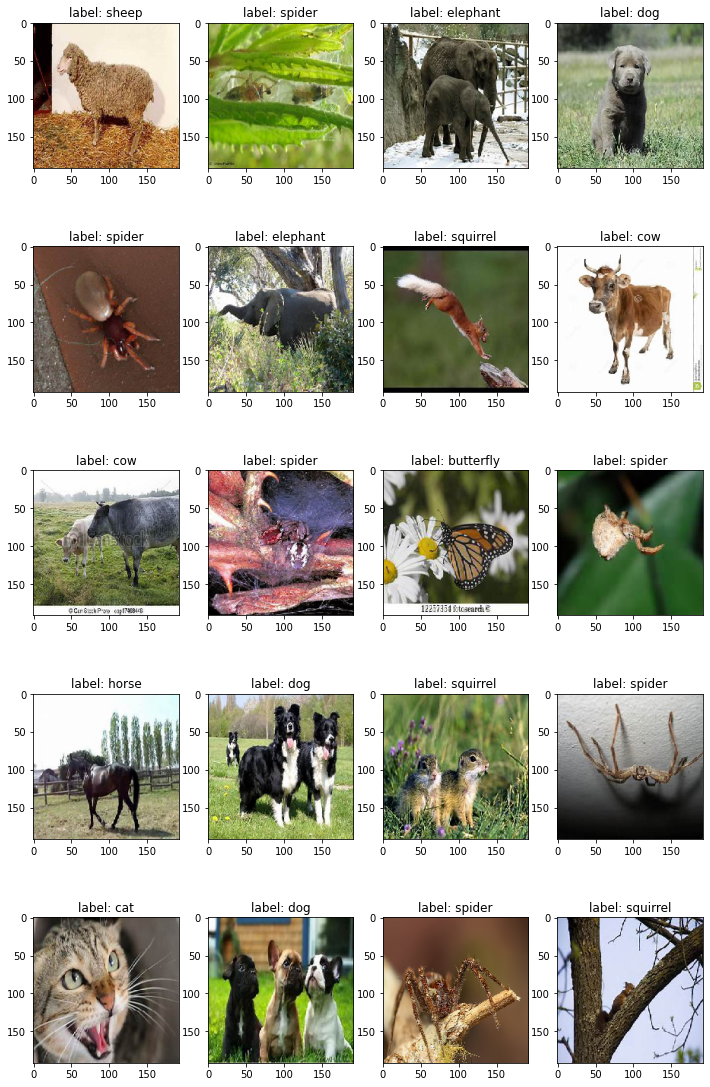

In [ ]:
images, labels = train_data.next()

n_rows = (len(images) // 4) + 1
plt.figure(figsize = (12,n_rows * 4))
# plt.subplots_adjust(hspace = 0.1)

for index, image in enumerate(images):
    plt.subplot(n_rows, 4, index + 1)
    plt.imshow(image)
    plt.title("label: {}".format(
        indices_class[np.argmax(labels[index])]
    ))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
layer_normalization_7 (Layer (None, 127, 127, 32)      64        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 125, 125, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)       

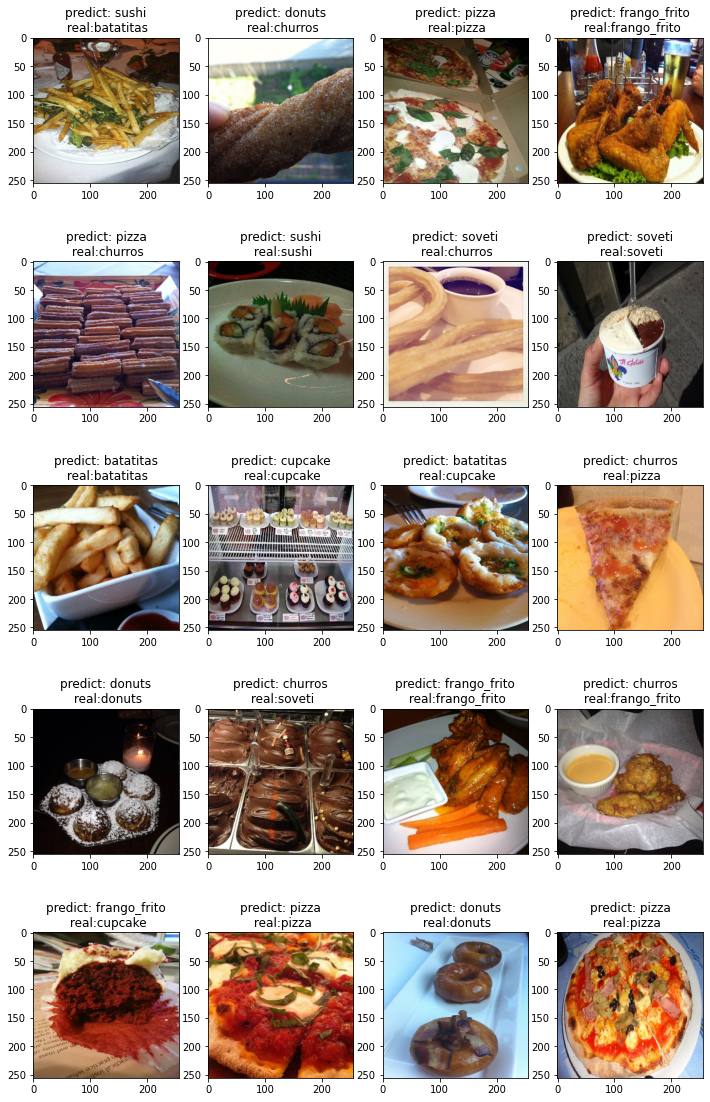

In [15]:
images, labels = val_data.next()
predicts = model.predict(images)

n_rows = (len(images) // 4) + 1
plt.figure(figsize = (12,n_rows * 4))
# plt.subplots_adjust(hspace = 0.1)

for index, image in enumerate(images):
    plt.subplot(n_rows, 4, index + 1)
    plt.imshow(image)
    plt.title("predict: {}\n real:{}".format(
        indices_class[np.argmax(predicts[index])],
        indices_class[np.argmax(labels[index])]
    ))